

# Project: Investigating No Show  medical appointment Data set



<a id='intro'></a>
## Introduction

### Dataset Description 

A person makes a doctor appointment, receives all the instructions but does not show up. The data has variables that will be analysed  to explain this. 110,527 medical appointments have been extracted and its 14 associated variables (characteristics). The most important one is of the patient show-up or no-show to the appointment.
### Question(s) for Analysis
Why do patients miss their medical appointments?

In [98]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

#### Successfully installed numpy-1.19.5 pandas-0.25.0

<a id='wrangling'></a>
## Data Wrangling



In [99]:
#Loadind dataset
import pandas as pd
df=pd.read_csv('Medical_appointment_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [100]:
df.shape

(110527, 14)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [102]:
#checking for missing values
df.isnull().sum().any()

False

### The data has no missing values

In [103]:
#list number of unique values for each column
df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [104]:
#checking for duplicates
df.duplicated()
sum(df.duplicated())



0

### The data has no duplicataes


### Data Cleaning


In [105]:
#Renaming column label
df.rename(columns={list(df)[13]:'No_Show'},inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [106]:
#Checking data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No_Show            object
dtype: object

In [107]:
#checking datatype for gender
type(df['Gender'][0])

str

In [108]:
#checking for data type of no show
type(df['No_Show'][0])

str

In [109]:
#checking for unique values
df['Gender'].unique()


array(['F', 'M'], dtype=object)

In [110]:
# check for unique values
df['No_Show'].unique()


array(['No', 'Yes'], dtype=object)

In [111]:
df['SMS_received'].unique()

array([0, 1])

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 

In [112]:
# Dataset with variable of interest extracted
df1=df[['Gender','No_Show','Age']]
df1.head()

,Gender,No_Show,Age
0,F,No,62
1,M,No,56
2,F,No,62
3,F,No,8
4,F,No,56


In [113]:
mean_Age=df.groupby(['No_Show','Gender'])['Age'].mean().unstack('Gender')
mean_Age

Gender,F,M
No_Show,,
No,39.590417,34.461372
Yes,36.162190,30.833010


#### There's a slight difference in the mean age of both male and female for those who miss or  attend to their appointment. 

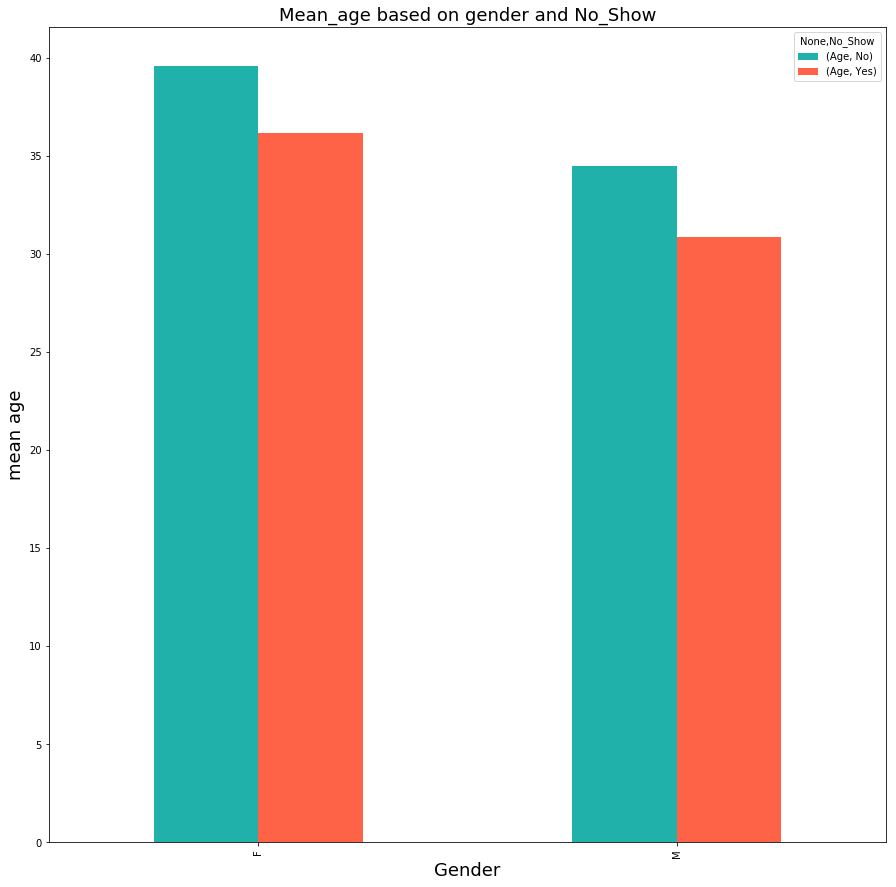

In [114]:
#Plotting stacked bar chart for df1
pivot = pd.pivot_table(data=df1, index=['Gender'], columns=['No_Show'])
pivot.plot.bar(stacked=False, color =['lightseagreen', 'tomato'], figsize=(15,15))
plt.title('Mean_age based on gender and No_Show',fontsize=18)
plt.xlabel('Gender',fontsize=18)
plt.ylabel('mean age',fontsize=18)
plt.show()

In [115]:
#Patient count of those received sms based on show up
counts_sms=df.groupby(['No_Show'],as_index=True)['SMS_received'].value_counts().unstack('SMS_received')
counts_sms

SMS_received,0,1
No_Show,,
No,62510,25698
Yes,12535,9784


#### A large number of those who turned up for appointment had received an sms reminder

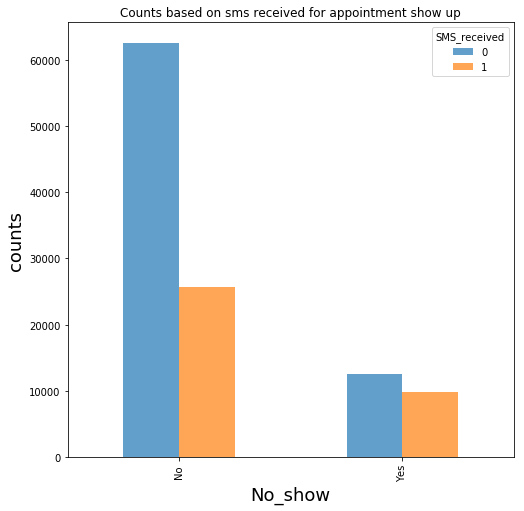

In [116]:
#data visualization

counts_sms.plot(kind='bar',title='Counts based on sms received for appointment show up',alpha=0.7,figsize=(8,8))
plt.xlabel('No_show',fontsize=18)
plt.ylabel('counts',fontsize=18)
plt.show()

In [117]:
#proportions of sms received in relation to show up 
counts_proportion=round(df.groupby(['SMS_received'])['No_Show'].value_counts(normalize = True).unstack()*100, 2)
counts_proportion

No_Show,No,Yes
SMS_received,,
0,83.30,16.70
1,72.43,27.57


#### only 16.70% of those who received sms reminders missed their appointment which is a relatively small proportion. On the contrary, for those who did not receive SMS reminders, 27.57% missed their appointment which relatively large proportion.

In [118]:
def mypercentageplot(df,xvar,label=['with','without']):
    ax=df.groupby(xvar)['No_Show'].value_counts().unstack(xvar).plot(kind='pie',subplots=True,figsize=(20,6), explode=[0,0.1],autopct=('%1.2f%%'));

    plt.suptitle(f"Percentage of show/No show by {xvar}".title(),fontsize=14,weight="bold")
    ax[0].set_title(f"Percentage of show/No show by:{label[0]} {xvar}".title(),fontsize=14,weight="bold")
    ax[1].set_title(f"Percentage of show/No show by:{label[1]} {xvar}".title(),fontsize=14,weight="bold")

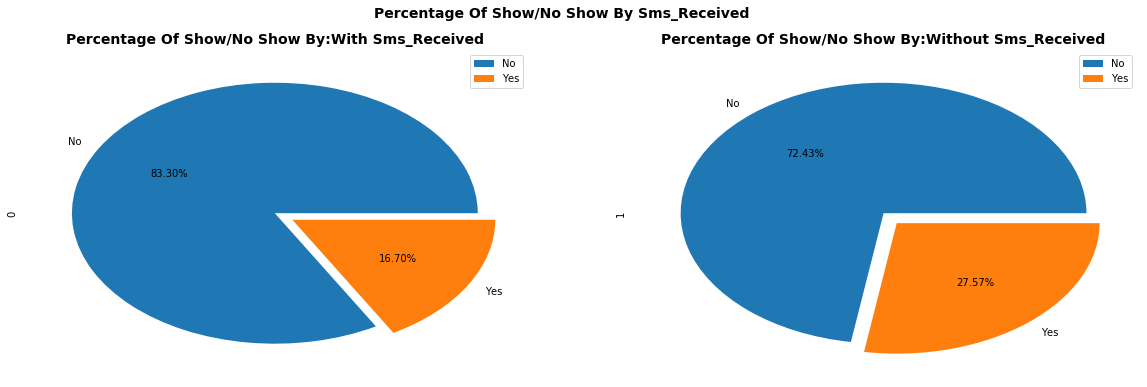

In [119]:
mypercentageplot(df,'SMS_received')

In [120]:
#Counts based gender and show up
counts_gender=df.groupby('Gender')['No_Show'].value_counts().unstack('Gender')
counts_gender

Gender,F,M
No_Show,,
No,57246,30962
Yes,14594,7725


### A large number of female attended their appointment as compared to male

In [121]:
#Proportionate Counts based gender and show up
counts_gender_proportion=df.groupby('Gender')['No_Show'].value_counts(normalize=True).unstack('Gender')
counts_gender_proportion

Gender,F,M
No_Show,,
No,0.796854,0.800321
Yes,0.203146,0.199679


#### A large proportion of the male turned up for their appointment as compared to their female counterpart. The difference in the proportion of female and male turning up for their medical appointment is relatively small with a value of ~0.003 or ~0.3%. Therefore, gender is not determinant to who shows up for appointment

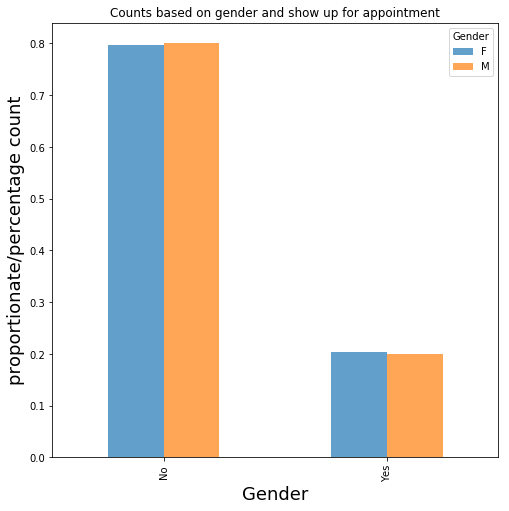

In [122]:
#data visualization

counts_gender_proportion.plot(kind='bar',alpha=0.7,figsize=(8,8))
plt.title('Counts based on gender and show up for appointment')
plt.xlabel('Gender',fontsize=18)
plt.ylabel('proportionate/percentage count',fontsize=18)
plt.show()


In [123]:
df['Age'].describe()


count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

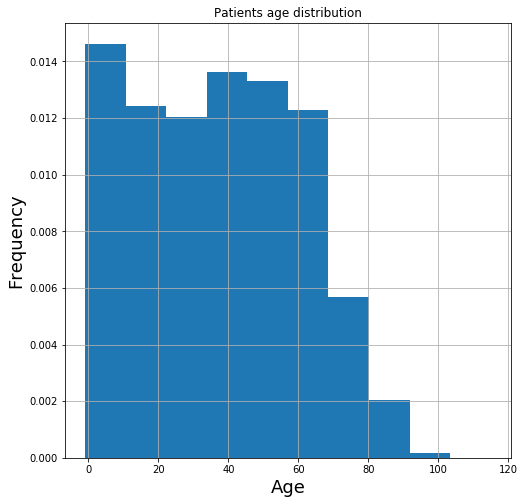

In [124]:
df1['Age'].hist(figsize=(8,8),normed= True)
#data visualization

plt.title('Patients age distribution')
plt.xlabel('Age',fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

## The histogram is skewed to the right

<a id='conclusions'></a>
## Conclusions
a)There's a slight difference in the mean age of both male and female for those missing or turning up for appointment

b)Generally a large number of women are likely to attend to their appointment but with a lower proportion of ~0.003 or ~0.3% as compared to the male counterpart. 

c)SMS reminders are effective in reducing the number of those who miss their appointments.

d)Age is skewed to the right, meaning older people, particularly the age of 36:58, are more likely to turn up for appointment

### Weakness

a)The age has negative values that limit statistical inference. Those who are below one year could have their values in decimal places and this datatype stored as a float 

b)No_show ought to be a numerical value to facilitate further statistical inference.

c) Most of the data is categorical thus limiting establishment of correlation between variables.

d) No show column somehow looks contradicting because NO means someone attended and YES someone did not attend appointment



In [125]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0